In [1]:
%matplotlib inline
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt

tpfs = search_targetpixelfile('KIC 6679295').download_all()

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
# Build the light curve
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())

# Clean the light curve
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

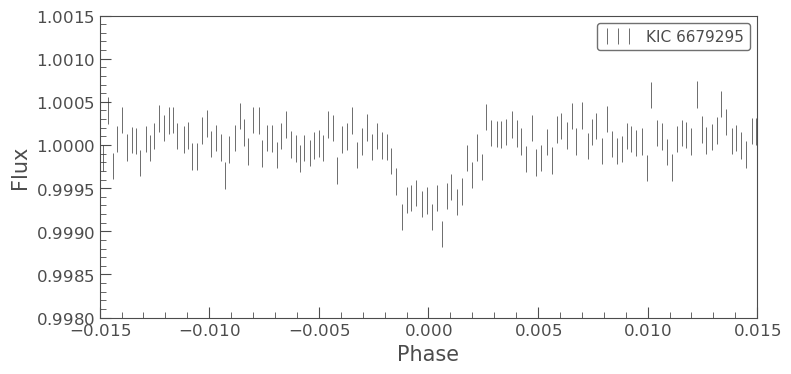

In [3]:
pipeline_lc.fold(period=24.57537, t0=21.3).bin().errorbar()
plt.xlim(-0.015, 0.015)
plt.ylim(0.998, 1.0015);

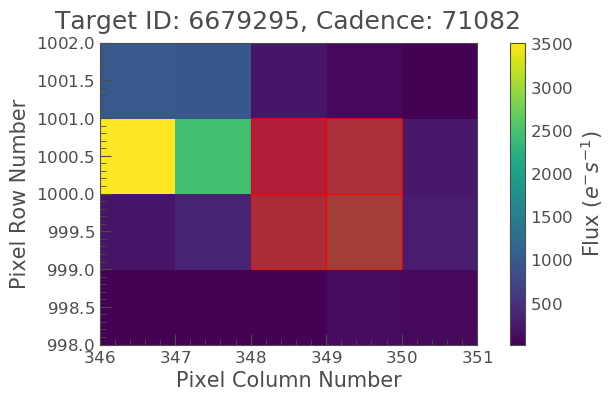

In [4]:
tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red');

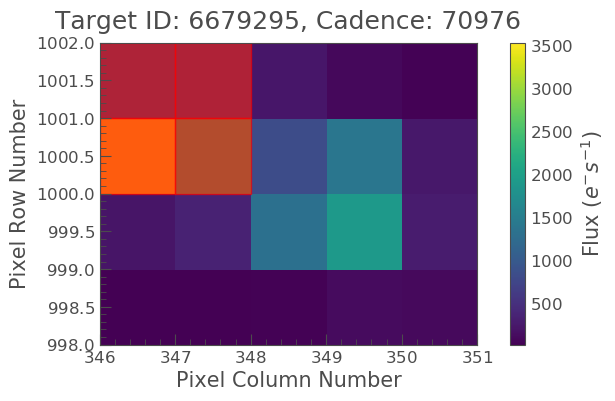

In [5]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[-2:, 0:2] = 1
tpf.plot(aperture_mask=aper, mask_color='red');

In [6]:
# Build the NEW aperture, and the light curve
aper = np.zeros(tpfs[0].shape[1:])
aper[-2:, 0:2] = 1
user_lc = tpfs[0].to_lightcurve(aperture_mask=aper.astype(bool)).flatten()
for tpf in tpfs:
    aper = np.zeros(tpf.shape[1:])
    aper[-2:, 0:2]=1
    user_lc = user_lc.append(tpf.to_lightcurve(aperture_mask=aper.astype(bool)).flatten())

# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()

(0.998, 1.0015)

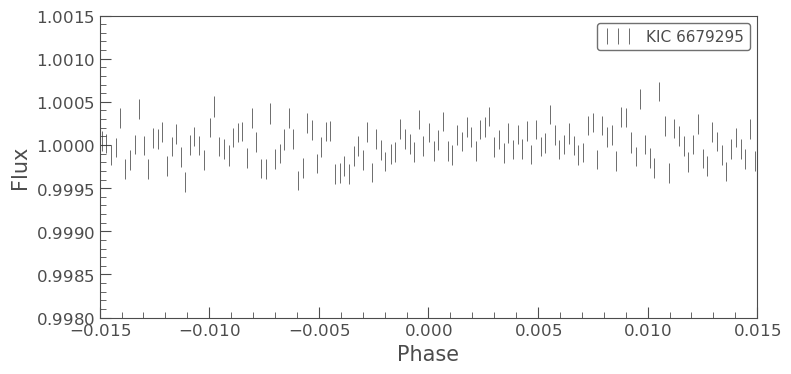

In [7]:
user_lc.fold(period=24.57537, t0=-0.133).bin().errorbar();
plt.xlim(-0.015,0.015)
plt.ylim(0.998,1.0015)